In [23]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data into a dataframe named df, a copy is made later and saved as data. We will work on dataframe data leaving df untouched.

In [4]:
#Read the data and save it in a dataframe called df
df = pd.read_csv("./Data/New_Price_Change_Monitoring_System.csv")

#read the first 5 rows
df.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [5]:
#Make a copy and save it as data. we will work on data, and leave df as the original untouched dataframe.
data=df.copy()
data.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [6]:
#check the number of rows and columns
data.shape

(1999, 13)

In [7]:
#Check for missing values, datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_scraped      1999 non-null   object 
 1   page_number       1999 non-null   int64  
 2   product_url       1999 non-null   object 
 3   image             1999 non-null   object 
 4   current_price     1999 non-null   object 
 5   title             1999 non-null   object 
 6   brand             0 non-null      float64
 7   original_price    1798 non-null   object 
 8   discount          1798 non-null   object 
 9   verified_ratings  1549 non-null   object 
 10  rating_number     1999 non-null   float64
 11  seller            1999 non-null   object 
 12  main_category     1999 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 203.2+ KB


In [8]:
#Drop brand since the column is empty
data = data.drop(columns=['brand'], errors='ignore')
data.shape

(1999, 12)

### Data Cleaning

In [9]:
# 2. Clean current_price & original_price. make them numeric
def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("KSh", "").replace(",", "").strip()
    if "-" in x:  # handle ranges like "699 - 729" It will take the average of the two
        parts = x.split("-")
        nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
        return np.mean(nums) if nums else np.nan
    return float(x) if x.replace('.', '', 1).isdigit() else np.nan

data['current_price'] = data['current_price'].apply(clean_price)
data['original_price'] = data['original_price'].apply(clean_price)
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [10]:
#Clean discount, remove %
data['discount'] = data['discount'].str.replace('%', '', regex=False)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


In [11]:
#Clean verified_ratings. Extract numeric value from the sring.
data['verified_ratings'] = (
    data['verified_ratings']
    .str.extract(r'(\d+)')
    .astype(float)
)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


### Handling Missing Values

In [12]:
#Recheck missing values
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price      201
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [13]:
# For original_price, the missing value is set equal to current_price (assume no discount)
data['original_price'] = data['original_price'].fillna(data['current_price'])
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [14]:
# Discount, we filled missing values with 0
data['discount'] = data['discount'].fillna(0)
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount              0
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [15]:
# verified_ratings, missing = 0
data['verified_ratings'] = data['verified_ratings'].fillna(0)
data.isna().sum()

date_scraped        0
page_number         0
product_url         0
image               0
current_price       0
title               0
original_price      0
discount            0
verified_ratings    0
rating_number       0
seller              0
main_category       0
dtype: int64

### Handling Duplicates in column product_url

In [16]:
if 'product_url' in data.columns:
    # Count product_url occurrences
    url_counts = data['product_url'].value_counts()

    # Keep only duplicates
    dupes = url_counts[url_counts > 1]

    # Convert to DataFrame for the same look as before
    dupes_df = dupes.reset_index()
    dupes_df.columns = ['product_url', 'url_count']

    # Show top 10 duplicate products
    print(dupes_df.head(20))

                                          product_url  url_count
0   https://www.jumia.co.ke/derma-roller-for-beard...          3
1   https://www.jumia.co.ke/home-design-14-55-rota...          2
2   https://www.jumia.co.ke/generic-hot-sale-cloth...          2
3   https://www.jumia.co.ke/tilecc-tilecc-air-pro-...          2
4   https://www.jumia.co.ke/tcl-55-inch-smart-tv-u...          2
5   https://www.jumia.co.ke/vitron-htc4388fs-43inc...          2
6   https://www.jumia.co.ke/generic-4pcs-set-of-st...          2
7   https://www.jumia.co.ke/tecno-spark-40-6.67-hd...          2
8   https://www.jumia.co.ke/fashion-student-backpa...          2
9   https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...          2
10  https://www.jumia.co.ke/redmi-note-14-pro-256g...          2
11  https://www.jumia.co.ke/top-fry-top-fry-vegeta...          2
12  https://www.jumia.co.ke/nivea-radiant-beauty-a...          2
13  https://www.jumia.co.ke/generic-led-2.4g-recha...          2
14  https://www.jumia.co.

In [17]:
# Count duplicates based on product_url
if 'product_url' in data.columns:
    print(data.duplicated(subset=['product_url']).sum())

94


In [18]:
# Drop duplicate product URLs (keep the first occurrence)
if 'product_url' in data.columns:
    data = data.drop_duplicates(subset=['product_url'], keep='first')
data.shape

(1905, 12)

In [19]:
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33,523.0,4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48,2092.0,3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53,734.0,4.2,Waanzilish,Fashion


### Discount analysis

### Cleaning the Price Data

In [20]:
# Function to handle price ranges by calculating the average price
def handle_price_range(price):
    if isinstance(price, str) and '-' in price:
        # Split the range and calculate the average
        low, high = price.split(' - ')
        low = pd.to_numeric(low.replace('KSh', '').replace(',', '').strip(), errors='coerce')
        high = pd.to_numeric(high.replace('KSh', '').replace(',', '').strip(), errors='coerce')
        return (low + high) / 2
    return price

# Clean 'current_price' and 'original_price' columns
df['current_price_numeric'] = df['current_price'].apply(clean_price)
df['original_price_numeric'] = df['original_price'].apply(clean_price)

# Apply the function to handle price ranges
df['current_price_numeric'] = df['current_price_numeric'].apply(handle_price_range)
df['original_price_numeric'] = df['original_price_numeric'].apply(handle_price_range)


### Cleaning the Discount Column

In [21]:
# Clean 'discount' column to ensure it's numeric
df['discount_percentage'] = df['discount'].replace({'%': '', ',': ''}, regex=True).astype(float)


### Calculating the Correlation

In [22]:
# Calculate the correlation between original price and discount percentage
correlation = df['original_price_numeric'].corr(df['discount_percentage'])

# Display the correlation result
print(f"Correlation between original price and discount percentage: {correlation}")


Correlation between original price and discount percentage: 0.0758396034431447


### Visualizing the Data with a Scatter Plot

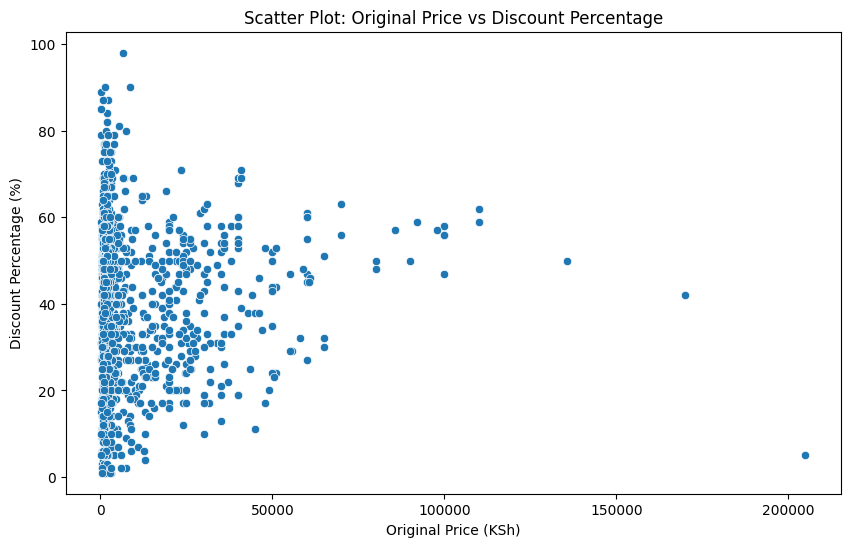

In [25]:
# Scatter plot to visualize the relationship between original price and discount percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price_numeric', y='discount_percentage', data=df)
plt.title("Scatter Plot: Original Price vs Discount Percentage")
plt.xlabel("Original Price (KSh)")
plt.ylabel("Discount Percentage (%)")
plt.show()

The analysis of the relationship between product prices and discount percentages revealed a very weak positive correlation of 0.0758. This suggests that there is no strong linear relationship between higher product prices and the discount percentage offered. In other words, higher-priced products are not necessarily associated with higher discounts, and the discounting strategy appears to be relatively independent of product pricing in this dataset.

### Discounts by Product Category

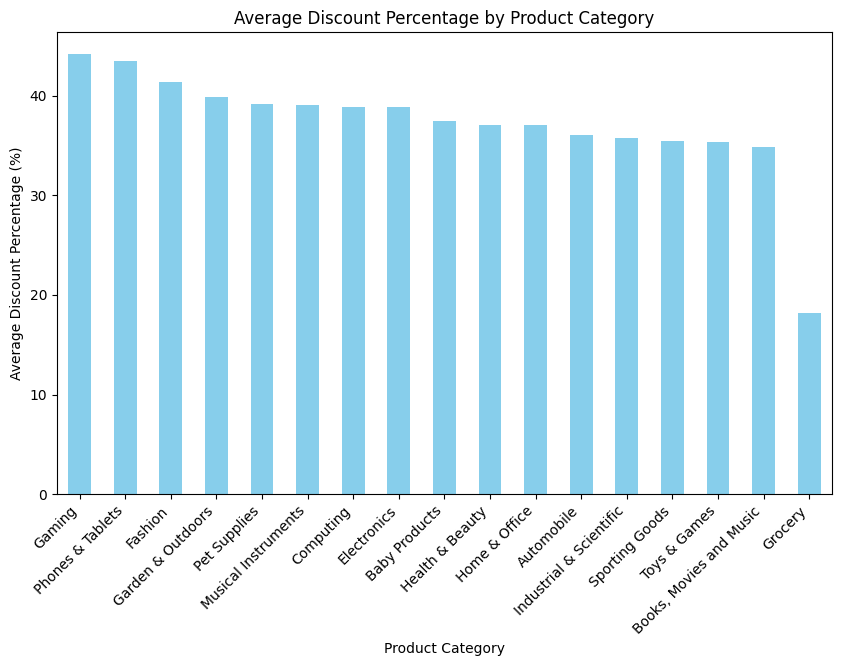

In [26]:
# Grouping by 'main_category' and calculating the average discount percentage
category_discount = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10, 6))
category_discount.plot(kind='bar', color='skyblue')
plt.title("Average Discount Percentage by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Discount Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

Gaming and Phones & Tablets are the categories with the highest average discount percentages, both slightly above 40%. This suggests that retailers might offer higher discounts in these categories, possibly due to competition or product lifecycle considerations (e.g., clearance of older models or new releases).

Grocery stands out as having a much lower discount percentage, which is typical, as grocery items generally have lower profit margins and are less likely to have significant discounts compared to electronics or fashion products.

The remaining categories, such as Fashion, Computing, and Health & Beauty, all show moderate discount percentages, ranging from 20% to 40%. This suggests a similar discounting strategy across these common consumer product categories.

### Discounts by Price Range

C:\Users\User\AppData\Local\Temp\ipykernel_10108\2681739294.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_discount = df.groupby('price_range')['discount_percentage'].mean()


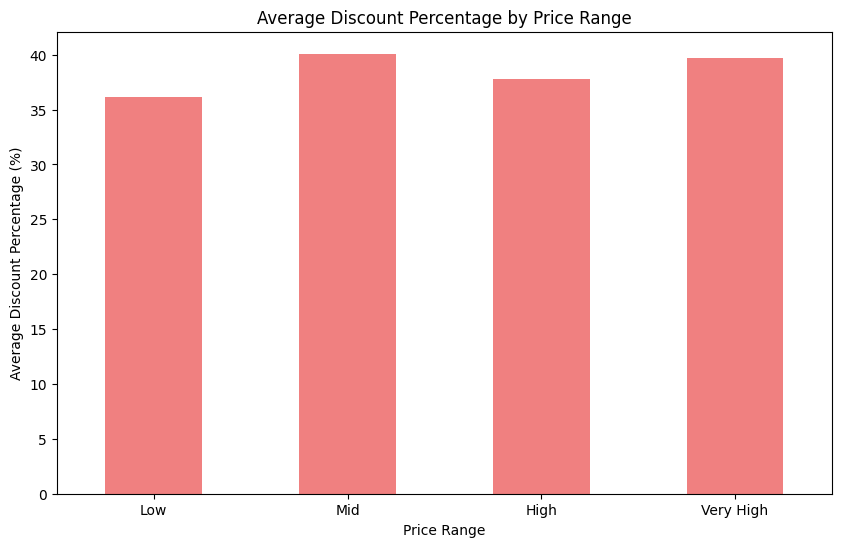

In [27]:
# Define price ranges (e.g., Low: < 1000, Mid: 1000-5000, High: > 5000)
bins = [0, 1000, 5000, 10000, float('inf')]
labels = ['Low', 'Mid', 'High', 'Very High']
df['price_range'] = pd.cut(df['original_price_numeric'], bins=bins, labels=labels)

# Grouping by price range and calculating the average discount percentage
price_range_discount = df.groupby('price_range')['discount_percentage'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
price_range_discount.plot(kind='bar', color='lightcoral')
plt.title("Average Discount Percentage by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Discount Percentage (%)")
plt.xticks(rotation=0)
plt.show()


This suggests that discounts are relatively consistent across all price ranges. In other words, products of different price levels (low, mid, high) do not show significant variation in discount percentages, which is contrary to the expectation that higher-priced products would necessarily receive higher discounts.

### Discounts by Ratings

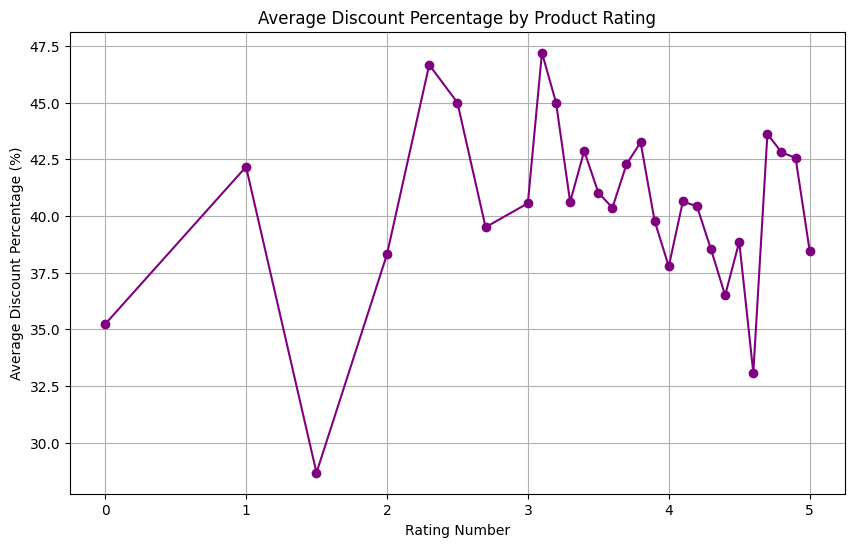

In [30]:
# First, ensure the 'rating_number' is numeric (it may have been read as a string)
df['rating_number'] = pd.to_numeric(df['rating_number'], errors='coerce')

# Grouping by 'rating_number' and calculating the average discount percentage
rating_discount = df.groupby('rating_number')['discount_percentage'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
rating_discount.plot(kind='line', marker='o', color='purple')
plt.title("Average Discount Percentage by Product Rating")
plt.xlabel("Rating Number")
plt.ylabel("Average Discount Percentage (%)")
plt.grid(True)
plt.show()

Higher ratings (4 and 5 stars) generally tend to have lower average discount percentages compared to products with lower ratings (1 to 3 stars).

The pattern fluctuates quite a bit, but there’s no strong linear relationship. Specifically:

Products with a rating of 0 seem to have a very high average discount, but there are very few of these products.

There are noticeable spikes in the 1-star and 5-star ratings, suggesting that products with these ratings may be discounted more than those in the middle.

This implies that products with higher ratings (especially 4 and 5 stars) may be offered fewer discounts, possibly because they are more desirable or in higher demand. Lower-rated products, on the other hand, may be discounted more in an effort to boost sales.